<a href="https://colab.research.google.com/github/zayo1511/LaboratorioDeAnalisisDeDatosFinancierosYDeDisenoDeIndicadores/blob/main/Reporte_Laboratorio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

###Funciones y datos iniciales

In [2]:
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

colors=["cornflowerblue", "indianred", "darkseagreen", "plum"]

###Primer escenario :

1. cac_google_ads(users):  11 + 0.02 * users

2. cac_facebook_ads(users): 5 + 0.05 * users

3. cac_content_marketing(users): 15 + 0.01 * users

4. cac_linkedin(users):  9 + 0.025 * users

* Budget = $50000

In [3]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 11 + 0.02 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 5 + 0.05 * users

def cac_content_marketing(users):
    return 15 + 0.01 * users

def cac_linkedin(users):
    return 9 + 0.025 * users

# Presupuesto total en USD
budget = 100000

In [4]:
# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 859
Facebook Ads: 403
Marketing de Contenidos: 1518
LinkedIn: 727
Costo total estimado: $100,000.00
Usuarios totales adquiridos: 3508


([0, 1, 2, 3],
 [Text(0, 0, 'Google Ads'),
  Text(1, 0, 'Facebook Ads'),
  Text(2, 0, 'Marketing de Contenidos'),
  Text(3, 0, 'LinkedIn')])

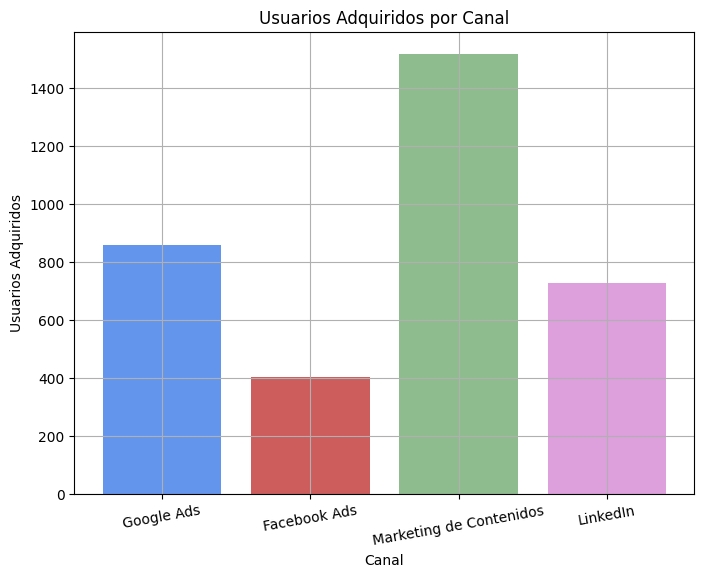

In [5]:
new_users = pd.DataFrame()
for i in range(len(result.x)):
    new_users[i] = np.round([(result.x[i])], 0)

channels=["Google Ads", "Facebook Ads", "Marketing de Contenidos", "LinkedIn"]
new_users.columns = channels

plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(new_users.columns, new_users.iloc[0].values, color=colors)
plt.title('Usuarios Adquiridos por Canal')
plt.xlabel('Canal')
plt.ylabel('Usuarios Adquiridos')
plt.xticks(rotation=10)

In [6]:
print(f"Google Ads: {int(result.x[0])*cac_google_ads(result.x[0])}")
print(f"Facebook: {int(result.x[1])*cac_facebook_ads(result.x[1])}")
print(f"Content Marketing: {int(result.x[2])*cac_content_marketing(result.x[2])}")
print(f"Linkedin: {int(result.x[3])*cac_linkedin(result.x[3])}")

Google Ads: 24211.3976289362
Facebook: 10149.712646936536
Content Marketing: 45821.52358389249
Linkedin: 19763.839592311222


([0, 1, 2, 3],
 [Text(0, 0, 'Google Ads'),
  Text(1, 0, 'Facebook Ads'),
  Text(2, 0, 'Marketing de Contenidos'),
  Text(3, 0, 'LinkedIn')])

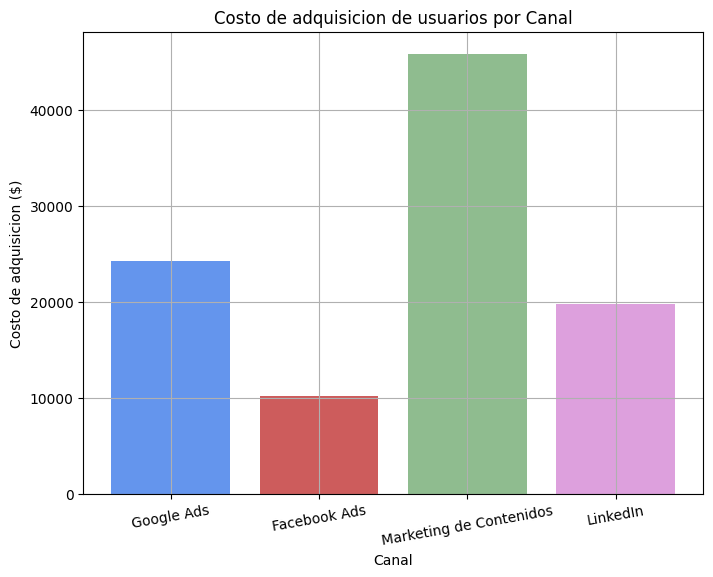

In [7]:
# Crear un DataFrame vacío
Costos_canal = pd.DataFrame()

# Lista de funciones de CAC y canales
funciones_cac = [cac_google_ads, cac_facebook_ads, cac_content_marketing, cac_linkedin]
canales = ["Google Ads", "Facebook Ads", "Marketing de Contenidos", "LinkedIn"]

# Calcular los costos y agregar cada cálculo como una columna en una sola fila
for i in range(len(result.x)):
    Costos_canal[i] = [int(result.x[i]) * funciones_cac[i](result.x[i])]

# Asignar nombres de columna
Costos_canal.columns = canales

plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(Costos_canal.columns, Costos_canal.iloc[0].values, color=colors)
plt.title('Costo de adquisicion de usuarios por Canal')
plt.xlabel('Canal')
plt.ylabel('Costo de adquisicion ($)')
plt.xticks(rotation=10)

#### CAC

In [8]:
df= pd.DataFrame({'Users': np.linspace(1,200,200)})
df['cac_google']= df['Users'].apply(lambda x: cac_google_ads(x))
df['cac_facebook']= df['Users'].apply(lambda x: cac_facebook_ads(x))
df['cac_marketing']= df['Users'].apply(lambda x: cac_content_marketing(x))
df['cac_linkedin']= df['Users'].apply(lambda x: cac_linkedin(x))
df

,Users,cac_google,cac_facebook,cac_marketing,cac_linkedin
0,1.0,11.02,5.05,15.01,9.025
1,2.0,11.04,5.10,15.02,9.050
2,3.0,11.06,5.15,15.03,9.075
3,4.0,11.08,5.20,15.04,9.100
4,5.0,11.10,5.25,15.05,9.125
...,...,...,...,...,...
195,196.0,14.92,14.80,16.96,13.900
196,197.0,14.94,14.85,16.97,13.925
197,198.0,14.96,14.90,16.98,13.950
198,199.0,14.98,14.95,16.99,13.975


In [9]:
df = df.drop(columns=['Users'])

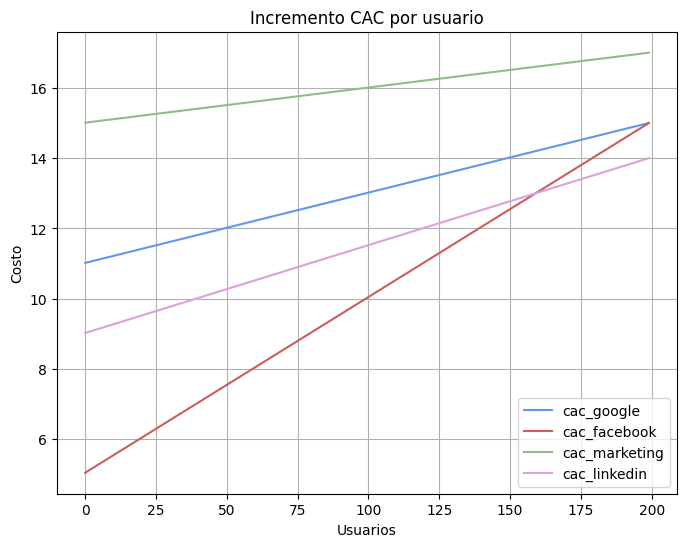

In [10]:
plt.figure(figsize=(8, 6))
for i, column in enumerate(df.columns):
    plt.plot(df[column], color=colors[i], label=column)
plt.title('Incremento CAC por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Costo')
plt.legend()
plt.grid()

In [11]:
df2= pd.DataFrame({'Users': np.linspace(1,1000,1000)})
df2['cac_google']= df2['Users'].apply(lambda x: cac_google_ads(x)*x)
df2['cac_facebook']= df2['Users'].apply(lambda x: cac_facebook_ads(x)*x)
df2['cac_marketing']= df2['Users'].apply(lambda x: cac_content_marketing(x)*x)
df2['cac_linkedin']= df2['Users'].apply(lambda x: cac_linkedin(x)*x)
df2

,Users,cac_google,cac_facebook,cac_marketing,cac_linkedin
0,1.0,11.02,5.05,15.01,9.025
1,2.0,22.08,10.20,30.04,18.100
2,3.0,33.18,15.45,45.09,27.225
3,4.0,44.32,20.80,60.16,36.400
4,5.0,55.50,26.25,75.25,45.625
...,...,...,...,...,...
995,996.0,30796.32,54580.80,24860.16,33764.400
996,997.0,30847.18,54685.45,24895.09,33823.225
997,998.0,30898.08,54790.20,24930.04,33882.100
998,999.0,30949.02,54895.05,24965.01,33941.025


In [12]:
df2 = df2.drop(columns=['Users'])

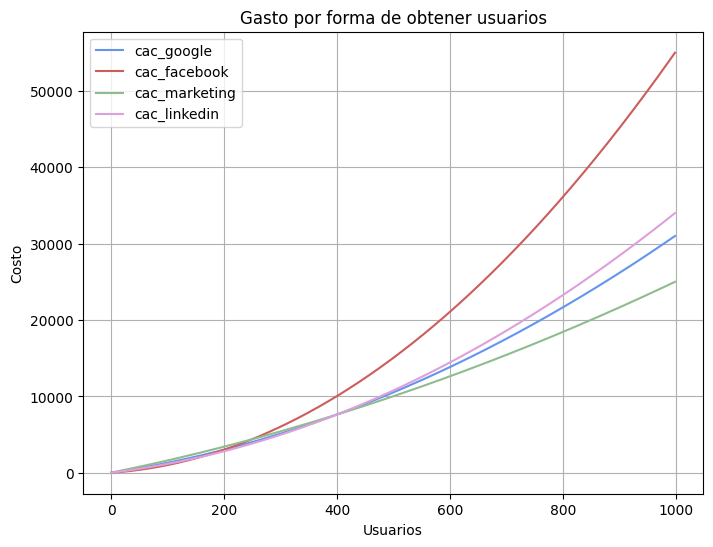

In [13]:
plt.figure(figsize=(8, 6))
for i, column in enumerate(df2.columns):
    plt.plot(df2[column], color=colors[i], label=column)
plt.title('Gasto por forma de obtener usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Costo')
plt.legend()
plt.grid()

###Segundo escenario :

1. cac_google_ads(users):  9 + 0.01*users

2. cac_facebook_ads(users): 7 + 0.02 * users

3. cac_content_marketing(users): 11 + 0.05 * users

4. cac_linkedin(users):  14 + 0.03 * users

* Budget = $25000

In [14]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 9 + 0.01 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 7 + 0.02 * users

def cac_content_marketing(users):
    return 11 + 0.05 * users

def cac_linkedin(users):
    return 14 + 0.03 * users

# Presupuesto total en USD
budget = 25000

In [15]:
# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 762
Facebook Ads: 431
Marketing de Contenidos: 132
LinkedIn: 170
Costo total estimado: $25,000.00
Usuarios totales adquiridos: 1496


([0, 1, 2, 3],
 [Text(0, 0, 'Google Ads'),
  Text(1, 0, 'Facebook Ads'),
  Text(2, 0, 'Marketing de Contenidos'),
  Text(3, 0, 'LinkedIn')])

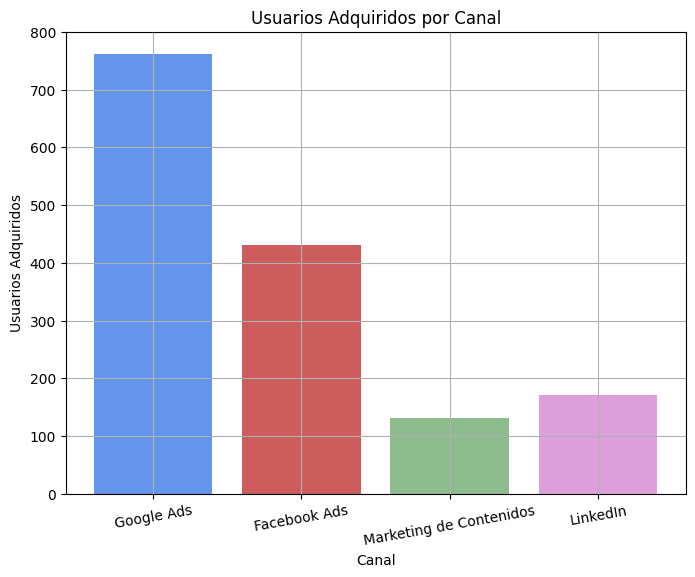

In [16]:
new_users = pd.DataFrame()
for i in range(len(result.x)):
    new_users[i] = np.round([(result.x[i])], 0)

channels=["Google Ads", "Facebook Ads", "Marketing de Contenidos", "LinkedIn"]
new_users.columns = channels

plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(new_users.columns, new_users.iloc[0].values, color=colors)
plt.title('Usuarios Adquiridos por Canal')
plt.xlabel('Canal')
plt.ylabel('Usuarios Adquiridos')
plt.xticks(rotation=10)

In [17]:
print(f"Google Ads: {int(result.x[0])*cac_google_ads(result.x[0])}")
print(f"Facebook: {int(result.x[1])*cac_facebook_ads(result.x[1])}")
print(f"Content Marketing: {int(result.x[2])*cac_content_marketing(result.x[2])}")
print(f"Linkedin: {int(result.x[3])*cac_linkedin(result.x[3])}")

Google Ads: 12665.559134114963
Facebook: 6732.8571324073255
Content Marketing: 2326.037390436103
Linkedin: 3250.6584057843424


([0, 1, 2, 3],
 [Text(0, 0, 'Google Ads'),
  Text(1, 0, 'Facebook Ads'),
  Text(2, 0, 'Marketing de Contenidos'),
  Text(3, 0, 'LinkedIn')])

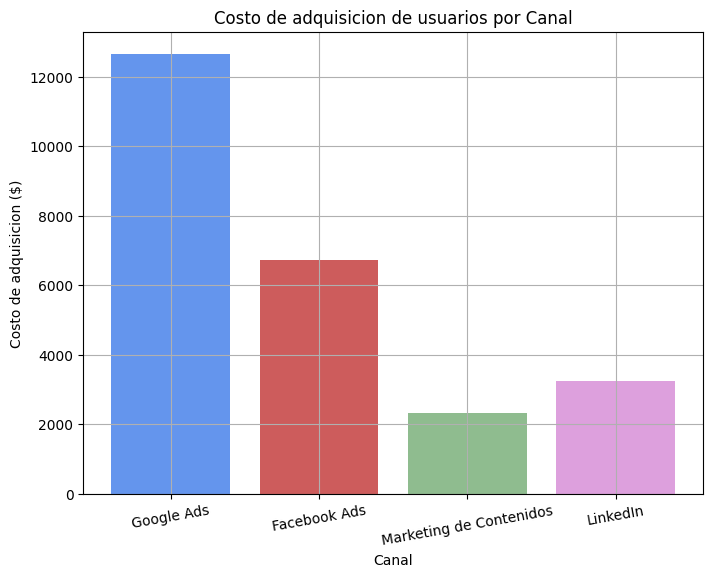

In [18]:
# Crear un DataFrame vacío
Costos_canal = pd.DataFrame()

# Lista de funciones de CAC y canales
funciones_cac = [cac_google_ads, cac_facebook_ads, cac_content_marketing, cac_linkedin]
canales = ["Google Ads", "Facebook Ads", "Marketing de Contenidos", "LinkedIn"]

# Calcular los costos y agregar cada cálculo como una columna en una sola fila
for i in range(len(result.x)):
    Costos_canal[i] = [int(result.x[i]) * funciones_cac[i](result.x[i])]

# Asignar nombres de columna
Costos_canal.columns = canales

plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(Costos_canal.columns, Costos_canal.iloc[0].values, color=colors)
plt.title('Costo de adquisicion de usuarios por Canal')
plt.xlabel('Canal')
plt.ylabel('Costo de adquisicion ($)')
plt.xticks(rotation=10)

#### CAC

In [19]:
df= pd.DataFrame({'Users': np.linspace(1,200,200)})
df['cac_google']= df['Users'].apply(lambda x: cac_google_ads(x))
df['cac_facebook']= df['Users'].apply(lambda x: cac_facebook_ads(x))
df['cac_marketing']= df['Users'].apply(lambda x: cac_content_marketing(x))
df['cac_linkedin']= df['Users'].apply(lambda x: cac_linkedin(x))
df

,Users,cac_google,cac_facebook,cac_marketing,cac_linkedin
0,1.0,9.01,7.02,11.05,14.03
1,2.0,9.02,7.04,11.10,14.06
2,3.0,9.03,7.06,11.15,14.09
3,4.0,9.04,7.08,11.20,14.12
4,5.0,9.05,7.10,11.25,14.15
...,...,...,...,...,...
195,196.0,10.96,10.92,20.80,19.88
196,197.0,10.97,10.94,20.85,19.91
197,198.0,10.98,10.96,20.90,19.94
198,199.0,10.99,10.98,20.95,19.97


In [20]:
df = df.drop(columns=['Users'])

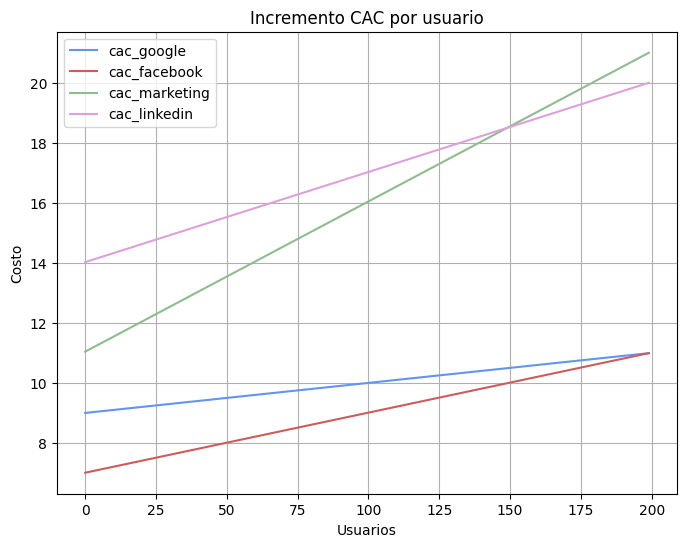

In [21]:
plt.figure(figsize=(8, 6))
for i, column in enumerate(df.columns):
    plt.plot(df[column], color=colors[i], label=column)
plt.title('Incremento CAC por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Costo')
plt.legend()
plt.grid()

In [22]:
df2= pd.DataFrame({'Users': np.linspace(1,1000,1000)})
df2['cac_google']= df2['Users'].apply(lambda x: cac_google_ads(x)*x)
df2['cac_facebook']= df2['Users'].apply(lambda x: cac_facebook_ads(x)*x)
df2['cac_marketing']= df2['Users'].apply(lambda x: cac_content_marketing(x)*x)
df2['cac_linkedin']= df2['Users'].apply(lambda x: cac_linkedin(x)*x)
df2

,Users,cac_google,cac_facebook,cac_marketing,cac_linkedin
0,1.0,9.01,7.02,11.05,14.03
1,2.0,18.04,14.08,22.20,28.12
2,3.0,27.09,21.18,33.45,42.27
3,4.0,36.16,28.32,44.80,56.48
4,5.0,45.25,35.50,56.25,70.75
...,...,...,...,...,...
995,996.0,18884.16,26812.32,60556.80,43704.48
996,997.0,18913.09,26859.18,60667.45,43778.27
997,998.0,18942.04,26906.08,60778.20,43852.12
998,999.0,18971.01,26953.02,60889.05,43926.03


In [23]:
df2 = df2.drop(columns=['Users'])

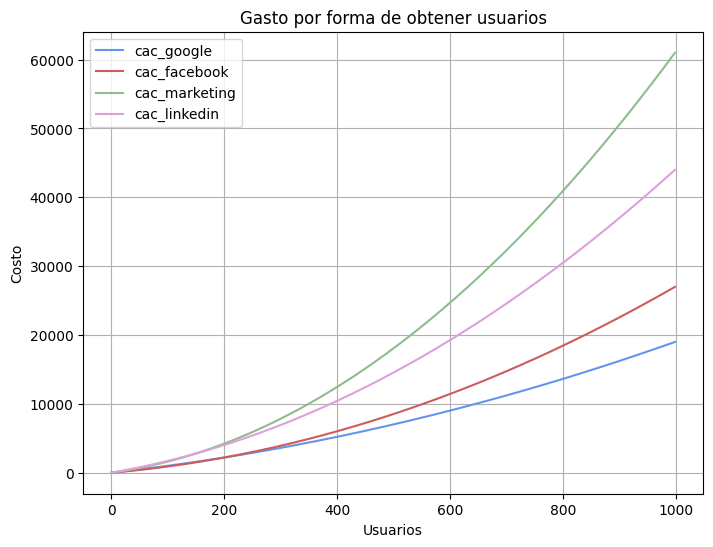

In [24]:
plt.figure(figsize=(8, 6))
for i, column in enumerate(df2.columns):
    plt.plot(df2[column], color=colors[i], label=column)
plt.title('Gasto por forma de obtener usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Costo')
plt.legend()
plt.grid()

###Tercer escenario :

1. cac_google_ads(users):  11 + 0.02 * users

2. cac_facebook_ads(users): 5 + 0.05 * users

3. cac_content_marketing(users): 15 + 0.01 * users

4. cac_linkedin(users):  9 + 0.025 * users

* Budget = $50000

In [25]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 11 + 0.02 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 5 + 0.05 * users

def cac_content_marketing(users):
    return 15 + 0.01 * users

def cac_linkedin(users):
    return 9 + 0.025 * users

# Presupuesto total en USD
budget = 50000

In [26]:
# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 556
Facebook Ads: 282
Marketing de Contenidos: 912
LinkedIn: 485
Costo total estimado: $50,000.00
Usuarios totales adquiridos: 2237


([0, 1, 2, 3],
 [Text(0, 0, 'Google Ads'),
  Text(1, 0, 'Facebook Ads'),
  Text(2, 0, 'Marketing de Contenidos'),
  Text(3, 0, 'LinkedIn')])

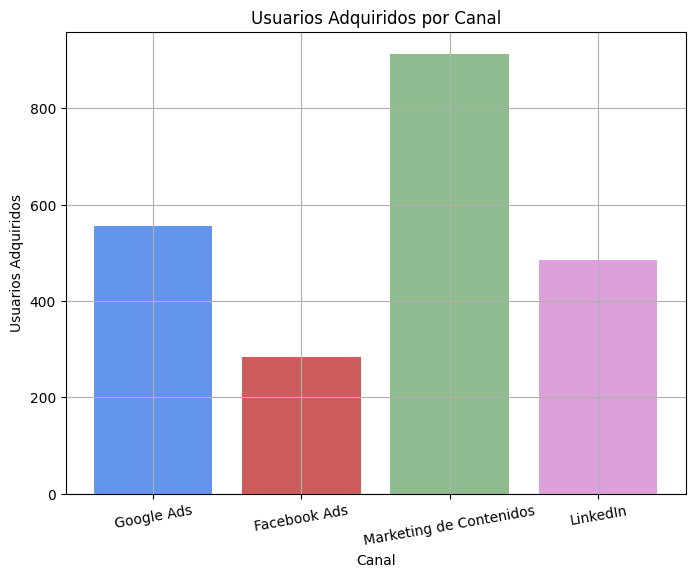

In [27]:
new_users = pd.DataFrame()
for i in range(len(result.x)):
    new_users[i] = np.round([(result.x[i])], 0)

channels=["Google Ads", "Facebook Ads", "Marketing de Contenidos", "LinkedIn"]
new_users.columns = channels

plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(new_users.columns, new_users.iloc[0].values, color=colors)
plt.title('Usuarios Adquiridos por Canal')
plt.xlabel('Canal')
plt.ylabel('Usuarios Adquiridos')
plt.xticks(rotation=10)

In [28]:
print(f"Google Ads: {int(result.x[0])*cac_google_ads(result.x[0])}")
print(f"Facebook: {int(result.x[1])*cac_facebook_ads(result.x[1])}")
print(f"Content Marketing: {int(result.x[2])*cac_content_marketing(result.x[2])}")
print(f"Linkedin: {int(result.x[3])*cac_linkedin(result.x[3])}")

Google Ads: 12303.87675492954
Facebook: 5394.4694978482485
Content Marketing: 22005.96025557883
Linkedin: 10247.828941726975


([0, 1, 2, 3],
 [Text(0, 0, 'Google Ads'),
  Text(1, 0, 'Facebook Ads'),
  Text(2, 0, 'Marketing de Contenidos'),
  Text(3, 0, 'LinkedIn')])

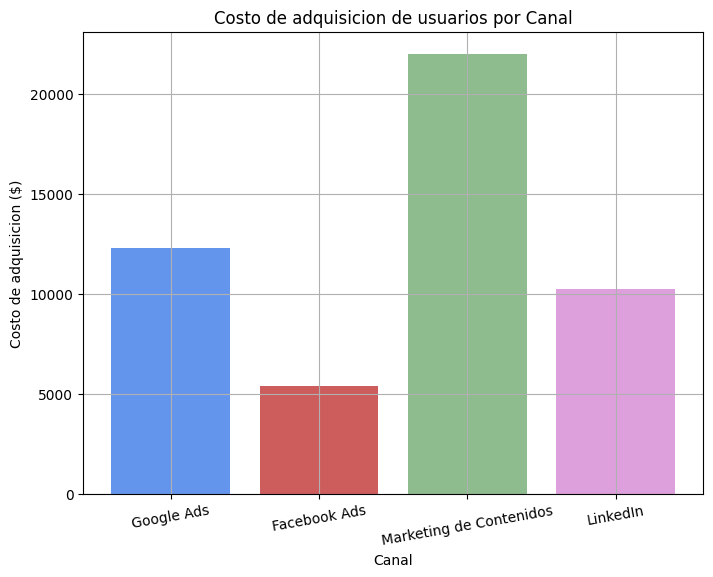

In [29]:
# Crear un DataFrame vacío
Costos_canal = pd.DataFrame()

# Lista de funciones de CAC y canales
funciones_cac = [cac_google_ads, cac_facebook_ads, cac_content_marketing, cac_linkedin]
canales = ["Google Ads", "Facebook Ads", "Marketing de Contenidos", "LinkedIn"]

# Calcular los costos y agregar cada cálculo como una columna en una sola fila
for i in range(len(result.x)):
    Costos_canal[i] = [int(result.x[i]) * funciones_cac[i](result.x[i])]

# Asignar nombres de columna
Costos_canal.columns = canales

plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(Costos_canal.columns, Costos_canal.iloc[0].values, color=colors)
plt.title('Costo de adquisicion de usuarios por Canal')
plt.xlabel('Canal')
plt.ylabel('Costo de adquisicion ($)')
plt.xticks(rotation=10)

#### CAC

In [30]:
df= pd.DataFrame({'Users': np.linspace(1,200,200)})
df['cac_google']= df['Users'].apply(lambda x: cac_google_ads(x))
df['cac_facebook']= df['Users'].apply(lambda x: cac_facebook_ads(x))
df['cac_marketing']= df['Users'].apply(lambda x: cac_content_marketing(x))
df['cac_linkedin']= df['Users'].apply(lambda x: cac_linkedin(x))
df

,Users,cac_google,cac_facebook,cac_marketing,cac_linkedin
0,1.0,11.02,5.05,15.01,9.025
1,2.0,11.04,5.10,15.02,9.050
2,3.0,11.06,5.15,15.03,9.075
3,4.0,11.08,5.20,15.04,9.100
4,5.0,11.10,5.25,15.05,9.125
...,...,...,...,...,...
195,196.0,14.92,14.80,16.96,13.900
196,197.0,14.94,14.85,16.97,13.925
197,198.0,14.96,14.90,16.98,13.950
198,199.0,14.98,14.95,16.99,13.975


In [31]:
df = df.drop(columns=['Users'])

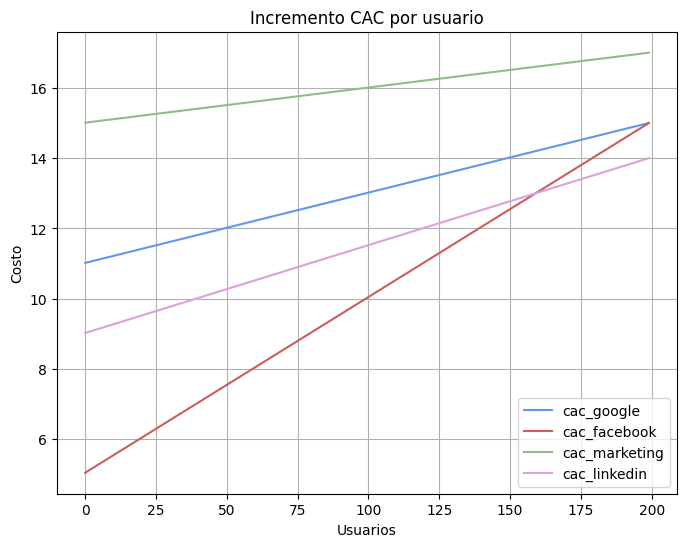

In [32]:
plt.figure(figsize=(8, 6))
for i, column in enumerate(df.columns):
    plt.plot(df[column], color=colors[i], label=column)
plt.title('Incremento CAC por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Costo')
plt.legend()
plt.grid()

In [33]:
df2= pd.DataFrame({'Users': np.linspace(1,1000,1000)})
df2['cac_google']= df2['Users'].apply(lambda x: cac_google_ads(x)*x)
df2['cac_facebook']= df2['Users'].apply(lambda x: cac_facebook_ads(x)*x)
df2['cac_marketing']= df2['Users'].apply(lambda x: cac_content_marketing(x)*x)
df2['cac_linkedin']= df2['Users'].apply(lambda x: cac_linkedin(x)*x)
df2

,Users,cac_google,cac_facebook,cac_marketing,cac_linkedin
0,1.0,11.02,5.05,15.01,9.025
1,2.0,22.08,10.20,30.04,18.100
2,3.0,33.18,15.45,45.09,27.225
3,4.0,44.32,20.80,60.16,36.400
4,5.0,55.50,26.25,75.25,45.625
...,...,...,...,...,...
995,996.0,30796.32,54580.80,24860.16,33764.400
996,997.0,30847.18,54685.45,24895.09,33823.225
997,998.0,30898.08,54790.20,24930.04,33882.100
998,999.0,30949.02,54895.05,24965.01,33941.025


In [34]:
df2 = df2.drop(columns=['Users'])

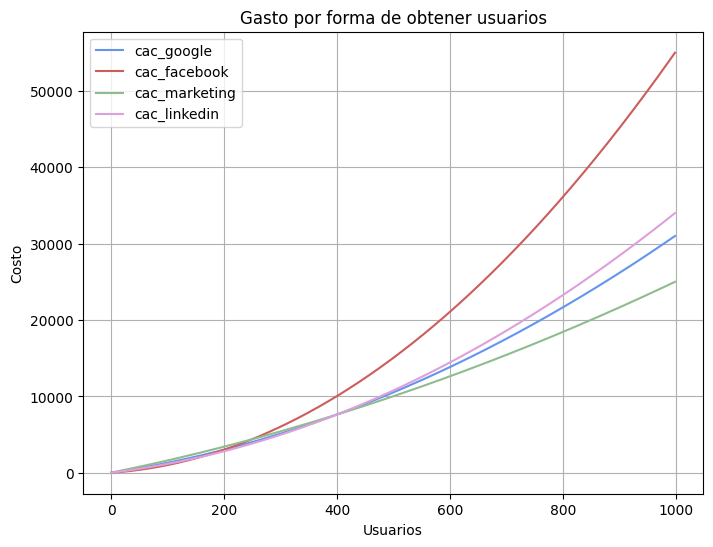

In [35]:
plt.figure(figsize=(8, 6))
for i, column in enumerate(df2.columns):
    plt.plot(df2[column], color=colors[i], label=column)
plt.title('Gasto por forma de obtener usuarios')
plt.xlabel('Usuarios')
plt.ylabel('Costo')
plt.legend()
plt.grid()

###Conculsiones: